In [1]:
import sys
sys.path.append("../") # Enables importing from parent directory
import fpl_draft_league.fpl_draft_league as fpl
import fpl_draft_league.utils as utils
import re
import pandas as pd
import json

In [2]:
df = utils.get_team_players_data()

In [3]:
df

,team_x,element,web_name,total_points,goals_scored,goals_conceded,clean_sheets,assists,bonus,draft_rank,element_type,points_per_game,red_cards,yellow_cards,plural_name
0,Rebecca,367,Foster,99,0,39,8,0,15,252,1,4.0,0,1,Goalkeepers
1,Rebecca,331,Vertonghen,48,1,20,3,1,4,183,2,3.0,0,2,Defenders
2,Rebecca,200,Wijnaldum,71,2,13,11,0,3,157,3,3.0,0,0,Midfielders
3,Rebecca,24,Taylor,17,0,19,2,0,0,497,2,1.7,0,2,Defenders
4,Rebecca,82,Mee,74,0,38,9,2,1,275,2,3.0,0,4,Defenders
5,Rebecca,393,Yarmolenko,49,3,14,3,1,8,132,3,3.3,0,2,Midfielders
6,Rebecca,209,Otamendi,57,2,17,4,1,5,182,2,3.6,0,3,Defenders
7,Rebecca,370,Pereyra,44,3,13,4,0,0,96,3,2.3,0,3,Midfielders
8,Rebecca,66,Callum Wilson,79,6,37,3,3,6,24,4,3.3,0,6,Forwards
9,Rebecca,102,Alonso,47,1,4,4,3,5,57,2,5.9,0,3,Defenders


## Refresh Data

In [4]:
import json
import getpass
import requests


def get_element_summary_data(email_address, elements):

    pwd = getpass.getpass('Enter Password: ')
    
    for element in elements:
        
        # Create a separate .json file for an element
        json_files = [f"../data/elements/{str(element)}.json"]
        
        # Write the api call
        apis = [f"https://draft.premierleague.com/api/element-summary/{str(element)}"]

        # Post credentials for authentication
        pwd = pwd
        session = requests.session()
        url = 'https://users.premierleague.com/accounts/login/'
        payload = {
         'password': pwd,
         'login': email_address,
         'redirect_uri': 'https://fantasy.premierleague.com/a/login',
         'app': 'plfpl-web'
        }
        session.post(url, data=payload)

        # Loop over the api(s), call them and capture the response(s)
        for file, i in zip(json_files, apis):
            r = session.get(i)
            jsonResponse = r.json()
            with open(file, 'w') as outfile:
                json.dump(jsonResponse, outfile)

In [6]:
elements_to_pull = df['element']

In [7]:
get_element_summary_data('lee.gower17@gmail.com', elements_to_pull)

Enter Password:  ·········


In [9]:
from pandas.io.json import json_normalize

players_dict = {}

for element in elements_to_pull:
    
    with open(f'../data/elements/{element}.json') as json_data:
        d = json.load(json_data)
        players_dict[element] = json_normalize(d['history'])
    

In [10]:
players_df = pd.concat(players_dict, ignore_index=True)

In [14]:
players_df[players_df['event'] == 1].sort_values(by='total_points', ascending=False)

,assists,bonus,bps,clean_sheets,creativity,detail,element,event,fixture,goals_conceded,...,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,threat,total_points,yellow_cards
1725,0,3,55,1,12.7,WHU (A) 0-5,215,1,8,0,...,90,19,0,0,0,0,0,74.0,20,1
1800,3,2,45,1,51.2,WHU (A) 0-5,218,1,8,0,...,90,19,0,0,0,0,0,39.0,14,0
1375,1,3,46,0,26.4,NOR (H) 4-1,189,1,1,1,...,73,14,0,0,0,0,0,21.0,12,0
1425,1,2,40,0,39.7,NOR (H) 4-1,192,1,1,1,...,90,14,0,0,0,0,0,39.0,12,0
175,1,3,41,1,13.3,WAT (A) 0-3,42,1,7,0,...,90,18,0,0,0,0,0,2.0,11,1
1925,0,2,34,1,0.0,CHE (H) 4-0,236,1,9,0,...,90,6,0,0,0,0,7,0.0,10,0
850,0,3,32,1,0.8,CRY (A) 0-0,143,1,4,0,...,90,7,0,0,0,0,0,0.0,9,0
200,0,2,29,1,0.0,WAT (A) 0-3,46,1,7,0,...,90,18,0,0,0,0,3,0.0,9,0
950,0,3,32,1,0.0,WOL (H) 0-0,160,1,5,0,...,90,20,0,0,0,0,0,0.0,9,0
1950,2,0,30,1,0.0,CHE (H) 4-0,239,1,9,0,...,90,6,0,0,0,0,0,0.0,9,0


In [65]:
players_df[['id','total_points']].groupby('id').sum()

,total_points
id,
92,99
110,63
148,83
160,106
161,56
184,115
193,147
219,75
303,85


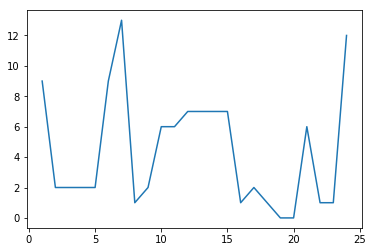

In [47]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(p160['event'], p160['total_points'])`

In [1]:
p160.columns

NameError: name 'p160' is not defined